## Epidemimodell 


I forbindelse med Covid19-epidemien har det vært mye snakk om å «flate ut kurven». Hva er denne kurven, og hvordan oppstår denne kurven? Vi skal her se på en enkel modell som beskriver epidemikurven, og bruke Python til å utforske den.

En mye brukt modell for å beskrive hvordan smitte sprer seg i en populasjon er SIR-modellen. I denne modellen blir populasjonen delt inn i tre grupper, mottakelige (Susceptible), smitta (Infected) og de som ikke lenger er smittsome, (Resistent eller Removed). 

For å lage en realistisk modell tilpasset et bestemt virus kan det være nødvendig må bruke en mer avansert modell. Modellen her tar for eksempel ikke hensyn til at en infeksjon kan ha lantenstid (perioden fra du blir smittet til du er smittsom), eller at det er variasjon i hvor smittsomme de smitta er. Den gir likevel et godt bilde av hvordan en epidemi utvikler seg i en populasjon. 

* **X**	Mottakelige, som ennå ikke har vært smittet eller er immune av andre grunner  (for eksempel vaksinerte). 
* **Y**	Smittsomme,  som har sjukdommen og kan smitte andre.
* **Z**	Ikke lenger smittsomme. De som er blitt friske og har blitt immune mot viruset, eller er immune fordi de er vaksinerte. Vi kan også telle med de som dør her.
* **N**	Totalt antall personer i populasjonen, X + Y + Z



Nye smittetilfeller kommer til ved at usmitta møter en mottakelig for smitte. 

Fra én smitta person i populasjonen tenker vi at det oppstår nye smittetilfeller med en rate 

>kontaktrate (personer/tid) ×  sannsynlighet for å overføre smitte til en mottakelig ×  sannsynlighet for at møtt person er mottakelig.

Det første delen her kaller vi smitteparameteren, 
>$a$=kontaktrate (personer/tid) ×  sannsynlighet for å overføre smitte til en mottakelig. 

I modellen tenker vi og at alle personer en smitta møter har samme sannsynlighet for å være mottakelig, slik at sannsynlighten for at en møtt person er mottakelig er lik andelen av mottakelige personer i populasjonen, altså $X/N$ (totalt antal smitta/totalt antall personer).

Siden dette gjelder for alle smitta i populasjonen, multipliserer vi med antallet smitta, og utrykket for totalt antall nye smittetilfeller (fra gruppe X til Y) per tid er da $a Y(t) X(t)/N$. 

Samtidig minker gruppa av smittsomme ved at de som er smittet blir friske eller immune, altså går inn  gruppe $Z$ her. Denne inneholder alle som ikke lenger er smittsomme. I denne modellen antar vi at de som er smittsomme blir friske og immune (fra gruppe Y til Z) med en rate b (enhet $tid^{-1}$). Samtidig forsvinner de som er syke ut av den smittsomme gruppa med en rate $b$, slik at antallet personer som går fra smittsom til resistent per tidsenhet blir $b Y(t)$. 

Dette gir tre differensiallikninger som beskriver hvordan antallet i de tre gruppene utvikler seg over tid, 
\begin{align}
X'(t) &=  &- a Y(t) \frac{X(t)}{N} &\\
Y'(t) &=  &  a Y(t) \frac{X(t)}{N}  & -b Y(t) \\
Z'(t) &=  &                    &           b Y(t) \\
\end{align}

Istedenfor $a$ og $b$ bruker vi vanligvis gjennomsnittlig lengde på smitterperioden, $T$ og reproduksjonstallet $R_0$. $b$ er da den inverse av smitterperioden, altså $b = 1/T$.  

$R_0$, eller reproduksjonstallet er det gjennomsnittlige antallet nye smittetilfeller en smittet fører til i en populasjon der alle er mottakelige. $a$ er i smitta/individ per tid, mens $R_0$ er vekst i smitta/indvid generasjon, eller $a = R_0/T$. 

I eksemplene under bruker vi (stort sett) $R_0=2.4$, og $T=10$. Dette er verdier som iblant er nevnt som mulige verdier for Covid-19, slik at tidsrommene blir omtrent som med covid-19. Formålet her er likevel bare å forklare  den enkleste formen for epidemodellen, ikke å lage en realistisk modell for epidemien.

For å se hvordan denne epidemimodellen utvikler seg over tid kan vi enkelt bruke Python til å finne en numerisk løsning. For å gjøre det skriver vi først differensiallikningene som en Python-funksjon (`sirmodel` i koden under), og bruker denne og et sett av startverdier som input til en annen funksjon (`odeint`), som integrerer likningsettet numerisk:



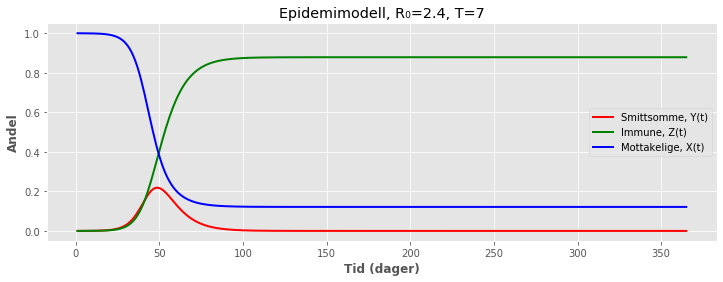

In [1]:
### Importer nødvendige bibliotek
import numpy as np                  # Numeriske vektorer     
from scipy.integrate import odeint  # Integrasjon av differensiallikninger
import matplotlib.pyplot as plt     # Plottefunksjoner

# Definer modellfunksjonen som definerer differensiallikningene,
# Tar en liste med X(t), Y(t), Z(t), t og paramterene a og b 
# og returnerer en liste med X'(t), Y'(t) og Z'(t) 
def sirmodel(xyz, t, a, b):
    X = xyz[0]    # Initialverdiene
    Y = xyz[1]
    Z = xyz[2]
    N = X + Y + Z
    dXdt = -a * X * Y / N          # X'(t)
    dYdt = a * X * Y / N - b * Y   # Y'(t)
    dZdt = b * Y                   # Z'(t)
    return dXdt, dYdt, dZdt


                              
# Parametre til modellen
N = 10000   # Velger en populasjonsstørrelse på 10.000
# Parameterverdier per generasjon (smitteforløp)
R0 = 2.4    # Initiell smitte på 0.4, dvs R0 = 0.4 * 1/7 = 
T = 7      # Smittsom 14 dager
# Paramterverdier per tid 
b = 1/T     # Per tid
a = R0/T    # Per 

# Initialverdier
Y0 = 1            # Starter med étt smittsomt individ
X0 = N-Y0         # Alle som ikke er smittet er mottakelige
Z0 = 0            # Ingen immune 
xyz = X0, Y0, Z0  # Liste med initialverdiene
# Tidsparameter. Tidsenhet er dager
dager = 365
t = np.linspace(1, dager, dager)  # Numerisk tidsvektor, 1,..,dager

# Integrer differensiallikningen 
epidemiutvikling = odeint(sirmodel,xyz, t, args=(R0/T,1/T))
X, Y, Z = epidemiutvikling.T


fig = plt.figure(figsize=(12,4))
plt.style.use('ggplot')      # Stiltema med grå bakgrunn 
plt.plot(t, Y/N, color="red",linewidth=2, label="Smittsomme, Y(t)")
plt.plot(t, Z/N, color="green",linewidth=2, label="Immune, Z(t)")
plt.plot(t, X/N, color="blue", linewidth=2, label="Mottakelige, X(t)")
plt.xlabel("Tid (dager)",fontweight="bold")
plt.ylabel("Andel",fontweight="bold")
plt.title(f"Epidemimodell, R₀={R0}, T={T}")
plt.legend()
plt.show()



Når vi nå har funnet $X(t)$, $Y(t)$ og $Z(t)$ kan vi sette disse inn i differensiallikningene og se hvordan de deriverte utvikler seg over tid:

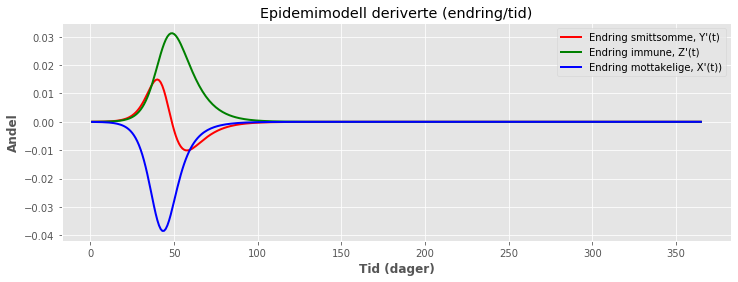

In [2]:
# Vi tar resultatet fra odeint og bruker sirmodel-funskjonen vi definerte til å
# finne verdiene av differensiallikningene. 
# Som over, X, Y, Z og t er vektorer med "dager", a og b er parametre.
dX, dY, dZ = sirmodel([X, Y, Z], t, a, b)

fig = plt.figure(figsize=(12,4))
yline = plt.plot(t, dY/N, color="red",linewidth=2, label="Endring smittsomme, Y'(t)")
zline = plt.plot(t, dZ/N, color="green",linewidth=2, label="Endring immune, Z'(t)")
xline = plt.plot(t, dX/N, color="blue", linewidth=2, label="Endring mottakelige, X'(t))")
plt.xlabel("Tid (dager)",fontweight="bold")
plt.ylabel("Andel",fontweight="bold")
plt.title(f"Epidemimodell deriverte (endring/tid)")
plt.legend()
plt.show()



### Immunitet

Dersom en populasjonen har så stor andel immune at $Y(t) < 0$, sier vi at populasjonen har oppnådd flokkimmunitet. Dersom smitta personer kommer inn i ein populasjon som har oppnådd flokkimmunitet kan de fortsatt smitte andre personer og føre til mindre utbrudd, men siden $Y'(t) < 0$ vil antallet smitta avta og ikke føre til en full epidemi i populasjonen. 


$Y'(t) = a Y(t) X(t)/N - b Y(t) = Y(t)( a X(t)/N -b) $

$Y'(t) < 0  \Leftrightarrow  a X(t)/N -b < 0 $

$X(t)/N < b/a = 1/R_0$ 

Når $1/R_0$ av populasjonen ikke lenger kan smittes, har populasjonen oppnådd flokkimmunitet. For å bruke eksempelet med $R_0=2.4$, når $X(t)/N < 0.42$, altså når 58% av populasjonen er immune, vil har populasjonen oppnådd flokkimmunitet.



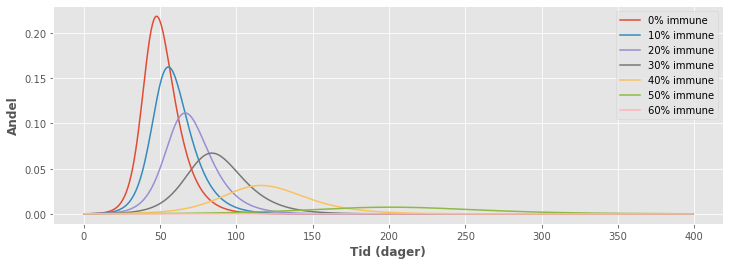

In [3]:
# Parametre til modellen

N = 10000   # Velger en populasjonsstørrelse på 10.000
R0 = 2.4 
T = 7

fig = plt.figure(figsize=(12,4))

# Initialverdier
Y0 = 1            # Starter med étt smittsomt individ

dager = 400
t = np.linspace(1, dager, dager)  # Numerisk tidsvektor, 1,..,dager
 
for prosent_z in range(0, 70, 10):
    Z0 = prosent_z / 100 * N # Antall immune 
    X0 = N - Y0 - Z0         # Mottakelige er alle - smitta - immune
    xyz = X0, Y0, Z0  
    # Integrer differensiallikningen 
    epidemiutvikling = odeint(sirmodel,xyz, t, args=(R0/T,1/T))
    X, Y, Z = epidemiutvikling.T
    plt.plot(Y/N, label=f"{prosent_z}% immune")
    
plt.xlabel("Tid (dager)",fontweight="bold")
plt.ylabel("Andel",fontweight="bold")
plt.legend()
plt.show()


Når det alt er en andel immune i populasjonen, ser vi at det ikke bare blir færre smitta, men også at epidemien bruker lenger tid på å nå toppen. Når det er 60% immune er det flokkimmunitet, og det blir ingen epidemi. 

Her ser vi forskjellen mellom en epidemi i en populasjon der alle er mottakelige, ukontrollert blir det en rask epidemi. Når samme virus seinere kommer inn i samme populasjon igjen, og mange er immune, får vi en mer avdempet og langvarig epidemi.


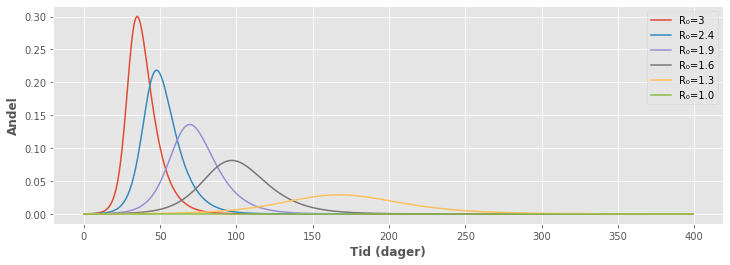

In [4]:
# Parametre til modellen

N = 10000   # Velger en populasjonsstørrelse på 10.000
# Initialverdier
Y0 = 1            # Starter med étt smittsomt individ
X0 = N-Y0         # Alle som ikke er smittet er mottakelige
Z0 = 0            # Ingen immune 
xyz = X0, Y0, Z0  # Liste med initialverdiene

fig = plt.figure(figsize=(12,4))

# Initialverdier
Y0 = 1            # Starter med étt smittsomt individ

dager = 400
t = np.linspace(1, dager, dager)  # Numerisk tidsvektor, 1,..,dager
 
for R0 in [3, 2.4, 1.9, 1.6, 1.3, 1.0]:
    # Integrer differensiallikningen 
    epidemiutvikling = odeint(sirmodel,xyz, t, args=(R0/T,1/T))
    X, Y, Z = epidemiutvikling.T
    plt.plot(Y/N, label=f"R₀={R0}")

plt.xlabel("Tid (dager)",fontweight="bold")
plt.ylabel("Andel",fontweight="bold")
plt.legend()
plt.show()


Flokkimmunitet blir oppnådd på punkter der $Y'(t)=0$, som også er toppen på smittekurven. Siden det på dette tidspunktet er mange smitta i populasjonen, vil smitten fortsatt spre seg i populasjonen, selv om antallet nysmitta er på veg nedover. For å hvor stor forskjellen på totalt antall smitta og flokkimmunitet er, kan vi plotte begge deler i samme graf for ulike verdier av $R_0$:

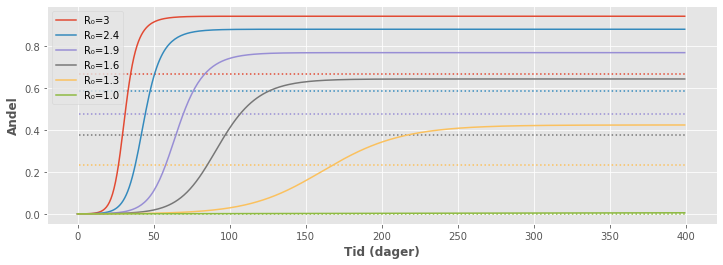

In [5]:
# Parametre til modellen

N = 10000   # Velger en populasjonsstørrelse på 10.000
# Initialverdier
Y0 = 1            # Starter med étt smittsomt individ
X0 = N-Y0         # Alle som ikke er smittet er mottakelige
Z0 = 0            # Ingen immune 
xyz = X0, Y0, Z0  # Liste med initialverdiene

fig = plt.figure(figsize=(12,4))
ax = plt.subplot()

dager = 400
t = np.linspace(1, dager, dager)  # Numerisk tidsvektor, 1,..,dager

for R0 in [3, 2.4, 1.9, 1.6, 1.3, 1.0]:
    # Integrer differensiallikningen 
    epidemiutvikling = odeint(sirmodel,xyz, t, args=(R0/T,1/T))
    X, Y, Z = epidemiutvikling.T
    # Total andel smitta
    S = (Y + Z)/N
    # Litt matplotlib-magi for å finne neste farge siden vi skal bruke den to steder
    color = next(ax._get_lines.prop_cycler)['color']
    # Totalt antall smitta over tid
    line = ax.plot(S, label=f"R₀={R0}", color=color)
    N_flokk = ( 1 - 1/R0)
    # Plott en prikkete linje i samme farge for å indikere hvor stor andel som 
    # må til for å oppnå flokkimmunitet
    ax.hlines( N_flokk,t[0],t[-1], linestyle=":", color=color )
plt.legend()
plt.xlabel("Tid (dager)",fontweight="bold")
plt.ylabel("Andel",fontweight="bold")
plt.show()




I figuren ser du for eksempel dersom vi reduserer smittetallet i en epidemi fra $R_0=2.4$ til $R_0=1.6$ gjennom smittverntiltak, vil likevel nok personer bli smittet til at vi har oppnår nok flokkimmunitet til å hindre en epidemi dersom smittevernet blir opphevet. (Den hele grå linja som viser total andel smitta for $R_0=1.6$ går høyere enn den blå stipla linja som viser flokkimmunitet for $R_0=2.4$.)


### Kontroll

Dersom vi innfører smitteverntiltak, kan vi redusere $R_0$. For å modellere dette med differensiallikningene, kan vi bruke modellen i intervaller, og bruke sluttpunktet av et
intervall som startverdier for neste. 




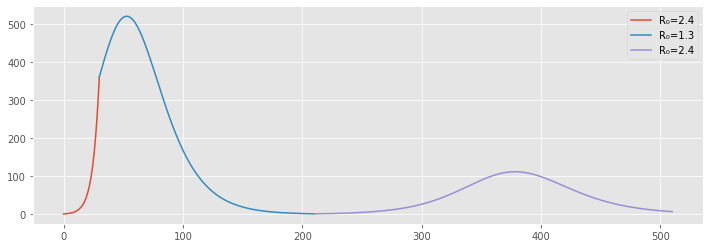

In [15]:
# N = 10000   # Velger en populasjonsstørrelse på 10.000

Y0 = 1            # Starter med étt smittsomt individ
X0 = N-Y0         # Alle som ikke er smittet er mottakelige
Z0 = 0            # Ingen immune 

# Lager en liste over R0-verdier vi vil modellere
# For eksempel 30 dager 2.4, streng kontroll i 180 dager og mindre streng kontroll etterpå 
R0_verdier = [2.4, 1.3, 2.4]
R0_varighet = [30, 180, 300 ]

fig = plt.figure(figsize=(12,4))

# Startverdier
xyz = X0, Y0, Z0 
dag = 0

for i in range(len(R0_varighet)):
    
    intervall = R0_varighet[i]
    R0 = R0_verdier[i]

    t = np.linspace(dag, dag + intervall, intervall)
    epidemiutvikling = odeint(sirmodel,xyz, t, args=(R0/T,1/T))
    X, Y, Z = epidemiutvikling.T
    plt.plot(t, Y, label=f"R₀={R0}") 

    # Til neste interval
    xyz = X[-1], Y[-1], Z[-1]
    dag = dag + intervall

    
plt.legend()
plt.show()
